## Health Insurance Cross Sell

### Background Information

- An Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

### Problem

- Most of sales in insurance company, spend a lot of time with a prospective client without knowing the client is interested or not

### Goals

- Build a machine learning to help the insurance company predict a prospective client that actually interested with the insurance, thus the company can create a business strategy to reach out to the client

### Columns Description

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

### Getting Basic Data Information

In [2]:
df = pd.read_csv('train1.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### Checking missing Values

In [4]:
df.isna().sum()


### From here we can see that there are no values, so no handling missing values needed

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
df.describe().T


### Average of the customer's age is 38, the oldest is 85
### Average of the annual premium is  30564.389581, the most expensive is 540165
### Most of the customer have been with the insurance company is 154 days

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [6]:
df.describe(include='O')


### Most of the customers is male
### Majority of the customers have a car age between 1-2 years
### Most of the customers have damaged their cars

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [7]:
datadesc = []
for i in df.columns:
    datadesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
desc = pd.DataFrame(data=datadesc, columns=['Data Features','Data Types','Null','% Null','Nunique','Unique_sample'])
desc

,Data Features,Data Types,Null,% Null,Nunique,Unique_sample
0,id,int64,0,0.0,381109,"[218419, 115121]"
1,Gender,object,0,0.0,2,"[Female, Male]"
2,Age,int64,0,0.0,66,"[53, 27]"
3,Driving_License,int64,0,0.0,2,"[0, 1]"
4,Region_Code,float64,0,0.0,53,"[16.0, 3.0]"
5,Previously_Insured,int64,0,0.0,2,"[1, 0]"
6,Vehicle_Age,object,0,0.0,3,"[1-2 Year, < 1 Year]"
7,Vehicle_Damage,object,0,0.0,2,"[No, Yes]"
8,Annual_Premium,float64,0,0.0,48838,"[27785.0, 19754.0]"
9,Policy_Sales_Channel,float64,0,0.0,155,"[89.0, 58.0]"


### Checking outliers with boxplot

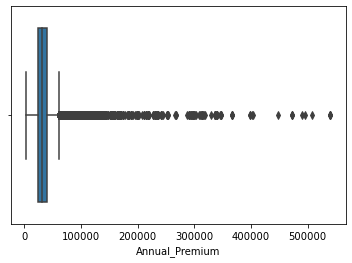

In [8]:
sns.boxplot(df['Annual_Premium'])
plt.show()

### From the boxplot we can see that there are so many outliers from annual premium
### However we're not going to drop it since it might be a valuable value

- We can move on to the next step, data analysis

#### Univariate

In [9]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [10]:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [11]:
df.stb.freq(['Gender'], cum_cols=False)

### 54 % of the customers is male

,Gender,count,percent
0,Male,206089,54.07613
1,Female,175020,45.92387


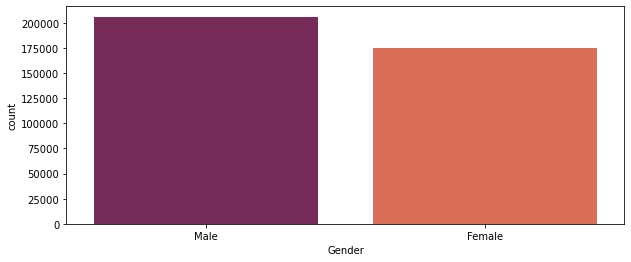

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(df['Gender'], palette ='rocket')
plt.show()

In [13]:
df['Age'].describe().T

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

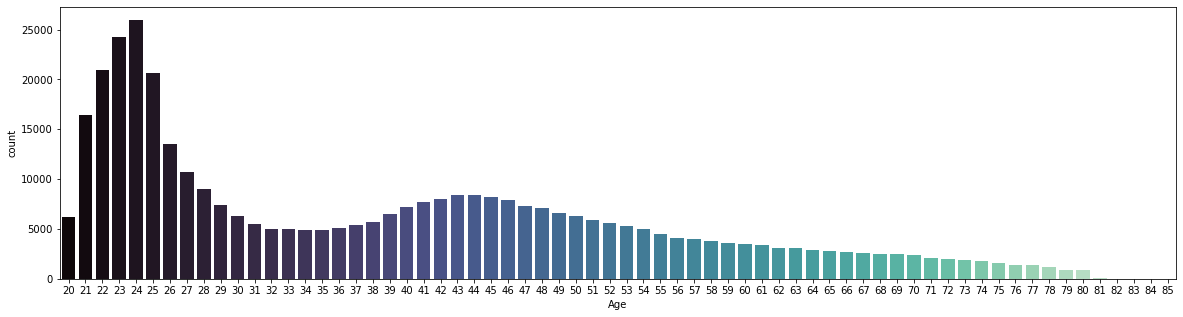

In [14]:
plt.figure(figsize =(20,5))
sns.countplot(df['Age'], palette='mako')

In [15]:
### Majority of the customer is 24 years old
### The average is 38 years old

In [16]:
df.stb.freq(['Driving_License'], cum_cols=False)
### Most of the customer have a driving license

,Driving_License,count,percent
0,1,380297,99.786938
1,0,812,0.213062


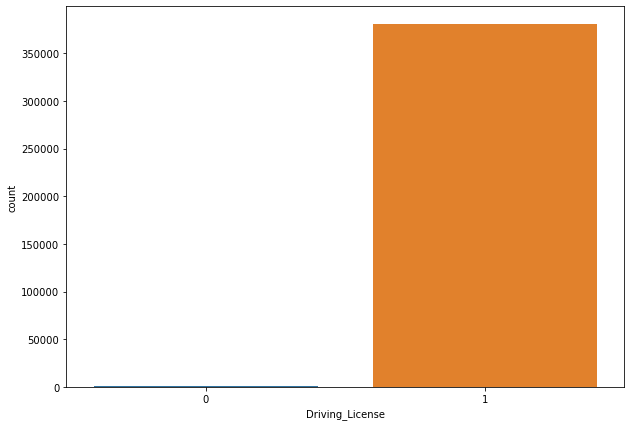

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(df['Driving_License'])
plt.show()

In [18]:
df['Region_Code'].describe().T

count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Region_Code, dtype: float64

In [19]:
df.stb.freq(['Region_Code'], cum_cols=False).head(10)
### Most of the customer lived in the 28 region

,Region_Code,count,percent
0,28.0,106415,27.922458
1,8.0,33877,8.889058
2,46.0,19749,5.181982
3,41.0,18263,4.792067
4,15.0,13308,3.491914
5,30.0,12191,3.198822
6,29.0,11065,2.903369
7,50.0,10243,2.687683
8,3.0,9251,2.427390
9,11.0,9232,2.422404


In [20]:
df.stb.freq(['Region_Code'], cum_cols=False).tail(10)
### Region code 52 have the lowest insunrance customer

,Region_Code,count,percent
43,34.0,1664,0.436620
44,19.0,1535,0.402772
45,22.0,1309,0.343471
46,40.0,1295,0.339798
47,5.0,1279,0.335600
48,1.0,1008,0.264491
49,44.0,808,0.212013
50,42.0,591,0.155074
51,52.0,267,0.070059
52,51.0,183,0.048018


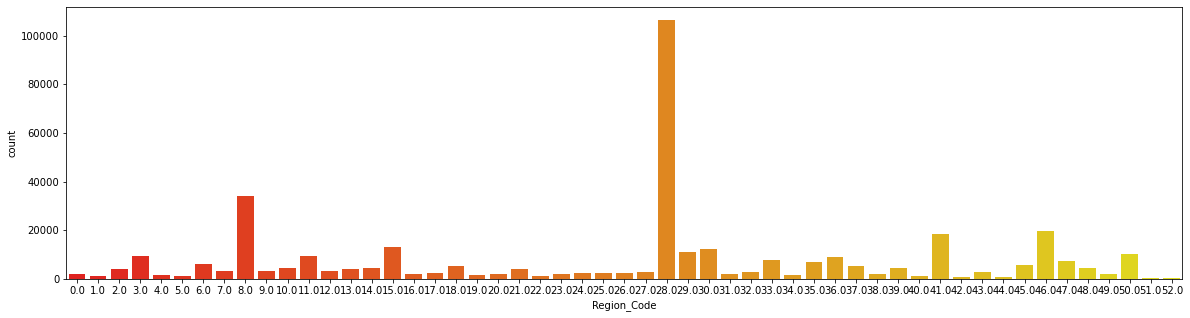

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(df['Region_Code'], palette='autumn')
plt.show()

In [22]:
df.stb.freq(['Previously_Insured'], cum_cols=False)
### More than a half of the customers do not have car insurance

,Previously_Insured,count,percent
0,0,206481,54.178988
1,1,174628,45.821012


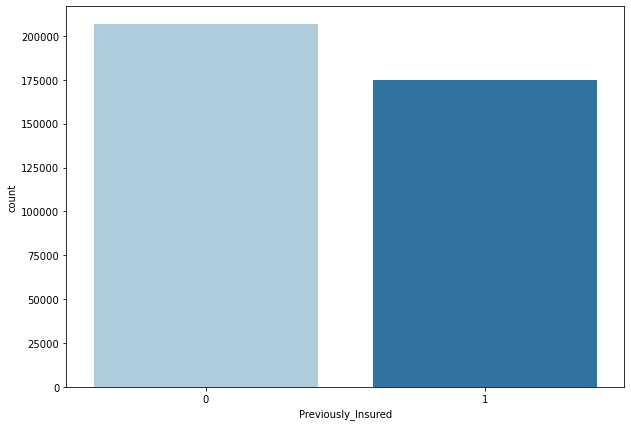

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(df['Previously_Insured'], palette = 'Paired')
plt.show()

In [24]:
df.stb.freq(['Vehicle_Age'], cum_cols=False)
### only 4 percent of the insurance customers who have cars more than 2 years

,Vehicle_Age,count,percent
0,1-2 Year,200316,52.561341
1,< 1 Year,164786,43.238549
2,> 2 Years,16007,4.200111


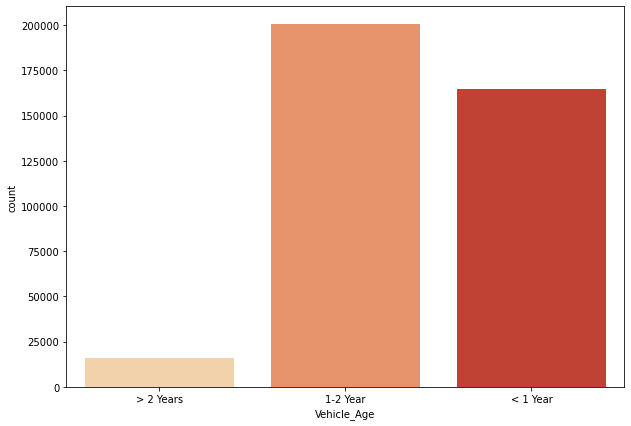

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(df['Vehicle_Age'], palette = 'OrRd')
plt.show()

In [26]:
df.stb.freq(['Vehicle_Damage'], cum_cols=False)
### Half of the customer have damaged their vehicles before

,Vehicle_Damage,count,percent
0,Yes,192413,50.487656
1,No,188696,49.512344


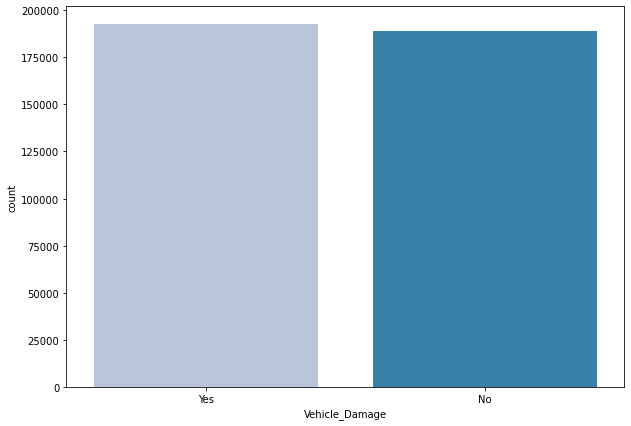

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(df['Vehicle_Damage'], palette = 'PuBu')
plt.show()

Since there are too many values in the Annual_Premium, we going to create a group of bin to make the analysis easier

In [28]:
bin_premium_group = [2600, 25000, 50000, 100000, 200000, df['Annual_Premium'].max()]
label_bin = ['Silver', 'Gold', 'Black', 'Platinum', 'Priority']

df['Insurance_level'] = pd.cut(df['Annual_Premium'], bins = bin_premium_group, labels = label_bin)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Insurance_level
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Gold
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Gold
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Gold
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Gold
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Gold


In [29]:
df.stb.freq(['Insurance_level'], cum_cols=False).head()
### from the table we can see that gold is the most popular premium level

,Insurance_level,count,percent
0,Gold,247942,65.058028
1,Silver,100963,26.491896
2,Black,31426,8.245935
3,Platinum,666,0.174753
4,Priority,112,0.029388


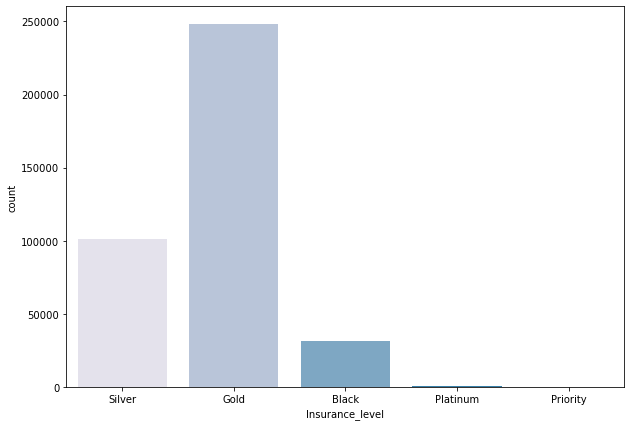

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(df['Insurance_level'], palette = 'PuBu')
plt.show()

In [58]:
df['Policy_Sales_Channel'].value_counts()
### Policy sales channel number 152 are the most effective way to sell the insurance followed by 26 and 124

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
149.0         1
84.0          1
143.0         1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [31]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Insurance_level
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Gold
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Gold
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Gold
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Gold
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Gold


#### Multivariate Analysis 

With response is our target, we going to analyze the relation between response and others features

In [32]:
## Gender and Response
pd.crosstab(index = df['Response'], columns = df['Gender'], normalize = 'index')

Gender,Female,Male
Response,,
0,0.469006,0.530994
1,0.389317,0.610683


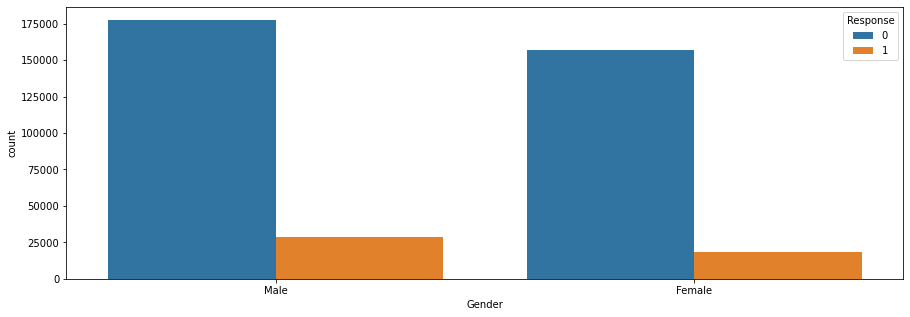

In [33]:
plt.figure(figsize = (15, 5))
sns.countplot(df['Gender'], hue = df['Response'])
plt.show()

## From the graphic we can see that more male interested with the vehicle insurance

In [34]:
pd.crosstab(index = df['Response'], columns = 'Average Age', values = df['Age'], aggfunc='mean')

col_0,Average Age
Response,
0,38.178227
1,43.435560


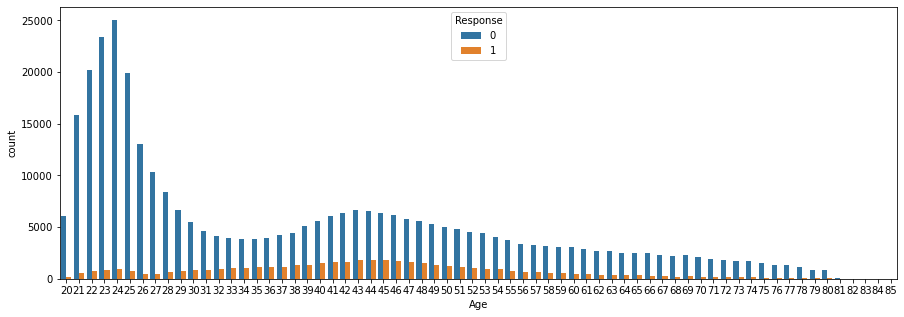

In [35]:
plt.figure(figsize = (15, 5))
sns.countplot(df['Age'], hue = df['Response'])
plt.show()
#From the figure we can see that age griup around 38 - 49 are more interested with the insurance offer

In [36]:
pd.crosstab(index = df['Response'], columns = df['Previously_Insured'])

Previously_Insured,0,1
Response,,
0,159929,174470
1,46552,158


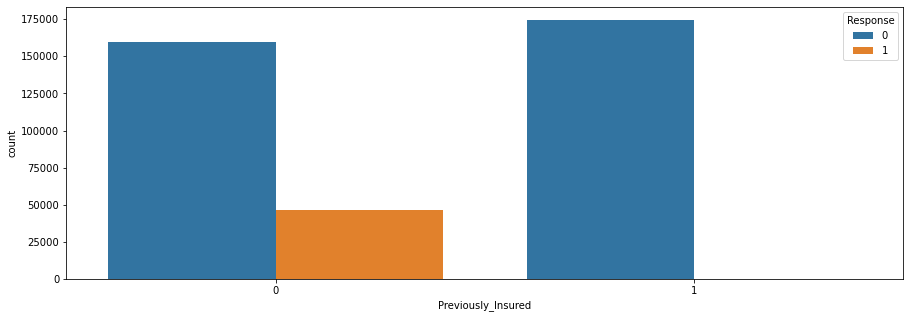

In [37]:
plt.figure(figsize = (15, 5))
sns.countplot(df['Previously_Insured'], hue = df['Response'])
plt.show()

## From the table and the graphic we can see that almost every customer who have insured their car not interested to have
## Another insurance
## Some customer who dont have car insurance are interested with the offer

In [38]:
pd.crosstab(index = df['Response'], columns = df['Driving_License'], normalize='columns' )

Driving_License,0,1
Response,,
0,0.949507,0.877283
1,0.050493,0.122717


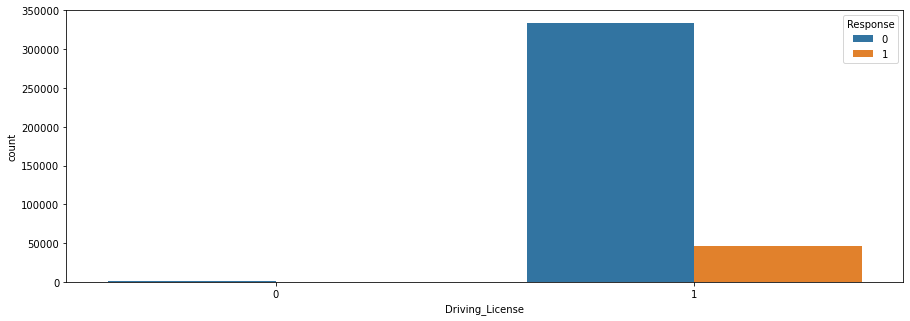

In [39]:
plt.figure(figsize = (15, 5))
sns.countplot(df['Driving_License'], hue = df['Response'])
plt.show()
### Clearly that people with driving license more interested with the offer

In [40]:
pd.crosstab(index = df['Response'], columns = df['Vehicle_Age'] )

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,165510,157584,11305
1,34806,7202,4702


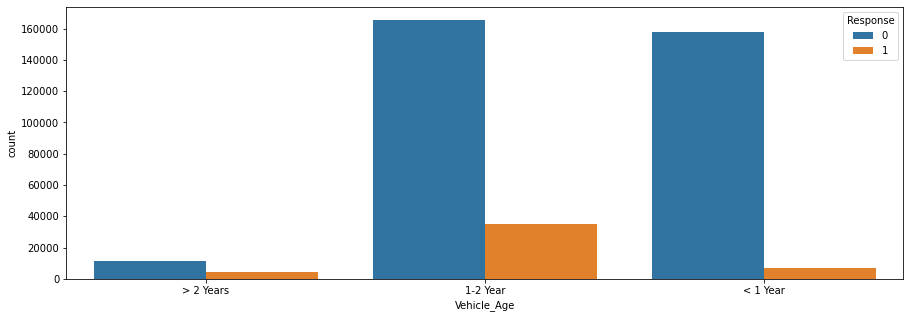

In [41]:
plt.figure(figsize = (15, 5))
sns.countplot(df['Vehicle_Age'], hue = df['Response'])
plt.show()

## From the graphic and the table people who have car around 1 to 2 years are more interested with the insurance sell
## As for older car majority are not interested
### People who have car less than 1 year around a quarter of them are interested

In [42]:
pd.crosstab(index = df['Response'], columns = df['Vehicle_Damage'], normalize = 'columns' )

## Customers who have damaged their car more likely to interested with the insurance offer

Vehicle_Damage,No,Yes
Response,,
0,0.994796,0.762345
1,0.005204,0.237655


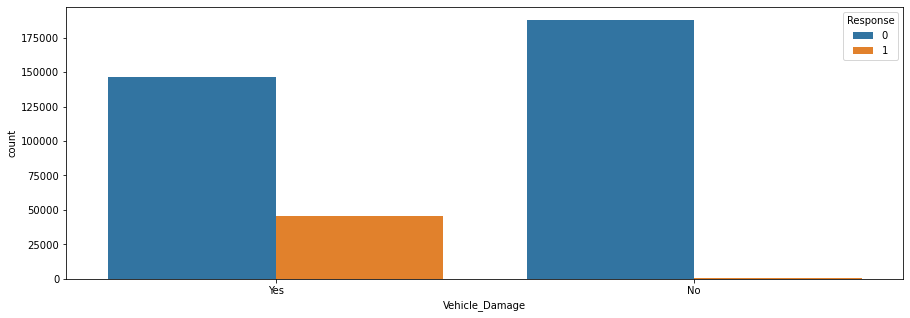

In [43]:
plt.figure(figsize = (15, 5))
sns.countplot(df['Vehicle_Damage'], hue = df['Response'])
plt.show()

In [44]:
pd.crosstab(index = df['Previously_Insured'], columns = df['Vehicle_Damage'], normalize = 'columns' )

Vehicle_Damage,No,Yes
Previously_Insured,,
0,0.127136,0.948434
1,0.872864,0.051566


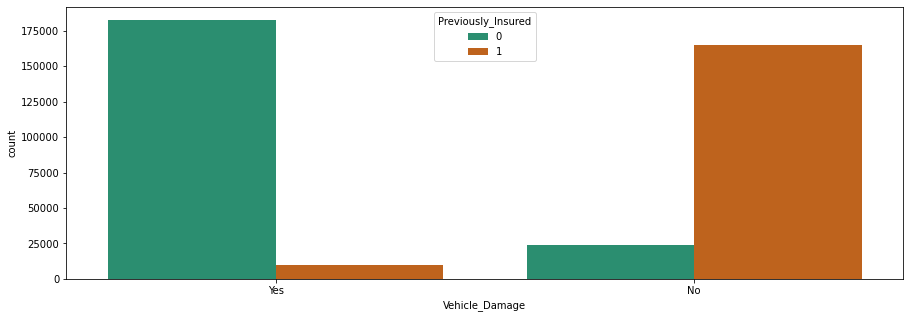

In [45]:
plt.figure(figsize = (15, 5))
sns.countplot(df['Vehicle_Damage'], hue = df['Previously_Insured'], palette ='Dark2')
plt.show()

### From the graphic and table, 95 % people who have damage their car doesnt have car insurance
### As for people who have insurance most of them did not damage their car
## This might be the reason why the response are very low

In [46]:
pd.crosstab(index = df['Vehicle_Age'], columns = df['Vehicle_Damage'], normalize = 'columns' )

Vehicle_Damage,No,Yes
Vehicle_Age,,
1-2 Year,0.382048,0.666405
< 1 Year,0.617872,0.250482
> 2 Years,0.000079,0.083113


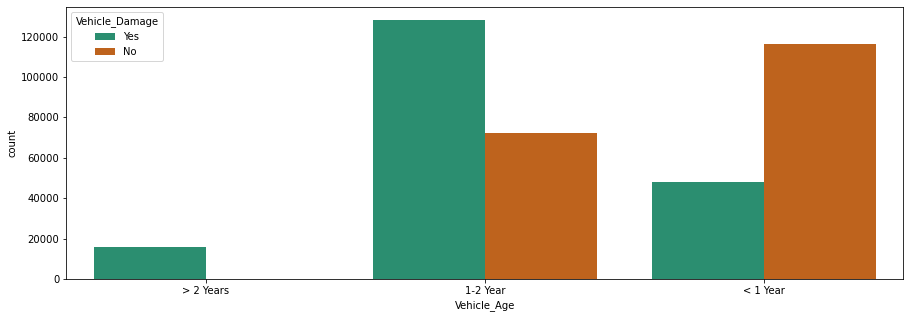

In [47]:
plt.figure(figsize = (15, 5))
sns.countplot(df['Vehicle_Age'], hue = df['Vehicle_Damage'], palette ='Dark2')
plt.show()

### People with car between 1-2 year more likely to damage their cars
### As for people with newer car they tend to be more safe in driving
## Most of pople who have car more than 2 years have damage their cars, 
## however since the data is very little its not showing a significant amount within the graphic

In [49]:
pd.crosstab(index = df['Vehicle_Age'], columns = [df['Vehicle_Damage'],df['Response']])
### Customers who have car between 1 -2 years are more interested with the insurance after they damage their car

Vehicle_Damage      No         Yes       
Response             0    1      0      1
Vehicle_Age                              
1-2 Year         71495  596  94015  34210
< 1 Year        116204  386  41380   6816
> 2 Years           15    0  11290   4702

In [52]:
pd.crosstab(index = df['Insurance_level'], columns = df['Response'], normalize =True )

Response,0,1
Insurance_level,,
Silver,0.233902,0.031017
Gold,0.571889,0.078691
Black,0.069928,0.012532
Platinum,0.001483,0.000265
Priority,0.000236,0.000058


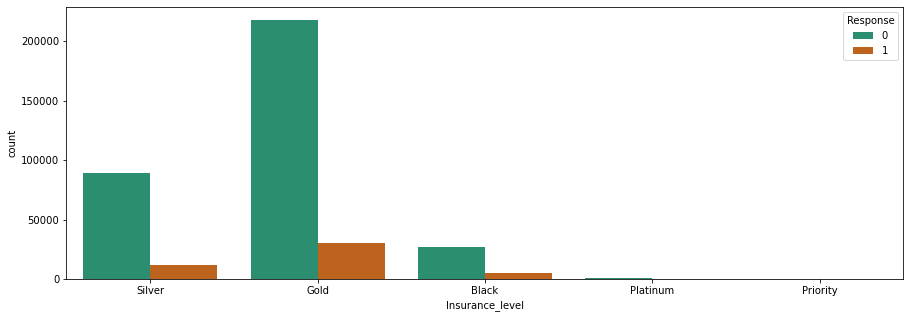

In [53]:
plt.figure(figsize = (15, 5))
sns.countplot(df['Insurance_level'], hue = df['Response'], palette ='Dark2')
plt.show()
#### The higher the annual premium doesnt mean the customer interested with the insurance

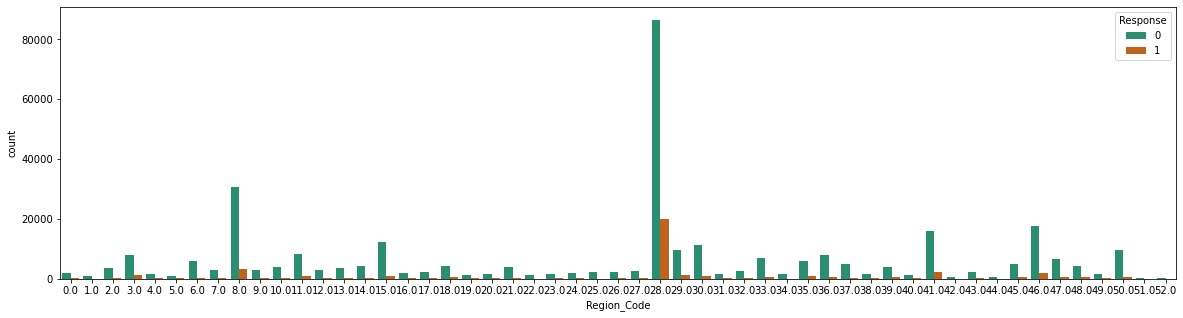

In [56]:
plt.figure(figsize = (20, 5))
sns.countplot(df['Region_Code'], hue = df['Response'], palette ='Dark2')
plt.show()
#### People from region code 28 are more interested with the insurance

In [59]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Insurance_level
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Gold
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Gold
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Gold
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Gold
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Gold


### Conclusion and Recommendation

- More men are interested with the vehicle insurance
- Most of customers are under 40
- Many customers car are 1-2 years old
- Almost all customers have driving license
- Most customers come from region 28 where we can focus on selling the insurance on those area
- The most effective way to sell the insurance is through policy sales cahnnel number 152 followed by 124
- Focusing on selling to people who have car for 1 - 2 years and have damage their cars
- Try to sell the insurance to men rather than women
- The more expensive the insurance does not mean people interested with it. Focus on people with gold level of insurance they might be more interested
- Sell to the customer of age between 20 - 40 years old, they are more interested than the older ones
- People who previously not have insurance more interested with the car insurance
- Do not waste time to try to sell to people who do not have driving license
- Focus on people who have damage their car